/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [1]:
pip install six numpy scipy Pillow matplotlib scikit-image opencv-python imageio Shapely

In [2]:
pip install files

  Created wheel for files: filename=files-1.1.1-cp36-none-any.whl size=3670 sha256=38a1ed03039cdb85feb2bb6e9965bc695f5c34068022453aead4df181b662d68
  Stored in directory: /root/.cache/pip/wheels/2f/b7/02/31aeb19506812ddfcf90210ea4f9f645fd5688f28dc312683b
Successfully built files


In [3]:
pip install imgaug

In [0]:
##xml 구조 파싱, annotaion에서 filename과 bounding box 정보 반환

import xml.etree.ElementTree as ET

def read_anntation(xml_file: str):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    bounding_box_list = []

    file_name = root.find('filename').text
    for obj in root.iter('object'):

        object_label = obj.find("name").text
        for box in obj.findall("bndbox"):
            x_min = int(box.find("xmin").text)
            y_min = int(box.find("ymin").text)
            x_max = int(box.find("xmax").text)
            y_max = int(box.find("ymax").text)

        bounding_box = [object_label, x_min, y_min, x_max, y_max]
        bounding_box_list.append(bounding_box)

    return bounding_box_list, file_name

In [0]:
##annotation 투플 리스트(bounding box, xml 파일명, 이미지 파일명) 반환

from os import listdir
import cv2
import numpy as np

def read_train_dataset(dir):
    images = []
    annotations = []

    for file in listdir(dir):
        if 'jpg' in file.lower() or 'png' in file.lower():
            images.append(cv2.imread(dir + file, 1))
            annotation_file = file.replace(file.split('.')[-1], 'xml')
            bounding_box_list, file_name = read_anntation(dir + annotation_file)
            annotations.append((bounding_box_list, annotation_file, file_name))

    images = np.array(images)

    return images, annotations

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
pip install pascal-voc-writer

In [8]:
dir = '/content/read'
images, annotations = read_train_dataset(dir)

for idx in range(len(images)):
   print(idx)

FileNotFoundError: ignored

In [0]:
##augmentation 된 이미지, xml 저장

import imgaug as ia
from imgaug import augmenters as iaa
from files import *
from pascal_voc_writer import Writer

ia.seed(1)

dir = '/content/read'
images, annotations = read_train_dataset(dir)

for idx in range(len(images)):
    image = images[idx]
    boxes = annotations[idx][0]

    ia_bounding_boxes = []
    for box in boxes:
        ia_bounding_boxes.append(ia.BoundingBox(x1=box[1], y1=box[2], x2=box[3], y2=box[4]))

    bbs = ia.BoundingBoxesOnImage(ia_bounding_boxes, shape=image.shape)


######1
    seq =  iaa.Fliplr(0.5)

    seq_det = seq.to_deterministic()

    image_aug = seq_det.augment_images([image])[0]
    bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]
    
    for i in range(len(bbs.bounding_boxes)):
        before = bbs.bounding_boxes[i]
        after = bbs_aug.bounding_boxes[i]
        print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f) aug1" % (
            i,
            before.x1, before.y1, before.x2, before.y2,
            after.x1, after.y1, after.x2, after.y2)
        )

    new_image_file = dir + 'after1_' + annotations[idx][2]
    cv2.imwrite(new_image_file, image_aug)

    h, w = np.shape(image_aug)[0:2]
    voc_writer = Writer(new_image_file, w, h)

    for i in range(len(bbs_aug.bounding_boxes)):
        bb_box = bbs_aug.bounding_boxes[i]
        voc_writer.addObject(boxes[i][0], int(bb_box.x1), int(bb_box.y1), int(bb_box.x2), int(bb_box.y2))

    voc_writer.save(dir + 'after1_' + annotations[idx][1])


######2
    seq = iaa.AddElementwise((-40, 40), per_channel=0.5)

    seq_det = seq.to_deterministic()

    image_aug = seq_det.augment_images([image])[0]
    bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]
    
    for i in range(len(bbs.bounding_boxes)):
        before = bbs.bounding_boxes[i]
        after = bbs_aug.bounding_boxes[i]
        print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f) aug2" % (
            i,
            before.x1, before.y1, before.x2, before.y2,
            after.x1, after.y1, after.x2, after.y2)
        )

    new_image_file = dir + 'after2_' + annotations[idx][2]
    cv2.imwrite(new_image_file, image_aug)

    h, w = np.shape(image_aug)[0:2]
    voc_writer = Writer(new_image_file, w, h)

    for i in range(len(bbs_aug.bounding_boxes)):
        bb_box = bbs_aug.bounding_boxes[i]
        voc_writer.addObject(boxes[i][0], int(bb_box.x1), int(bb_box.y1), int(bb_box.x2), int(bb_box.y2))

    voc_writer.save(dir + 'after2_' + annotations[idx][1])



  ######3
    seq = iaa.Add((-10, 10), per_channel=0.5)

    seq_det = seq.to_deterministic()

    image_aug = seq_det.augment_images([image])[0]
    bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]
    
    for i in range(len(bbs.bounding_boxes)):
        before = bbs.bounding_boxes[i]
        after = bbs_aug.bounding_boxes[i]
        print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f) aug3" % (
            i,
            before.x1, before.y1, before.x2, before.y2,
            after.x1, after.y1, after.x2, after.y2)
        )

    new_image_file = dir + 'after3_' + annotations[idx][2]
    cv2.imwrite(new_image_file, image_aug)

    h, w = np.shape(image_aug)[0:2]
    voc_writer = Writer(new_image_file, w, h)

    for i in range(len(bbs_aug.bounding_boxes)):
        bb_box = bbs_aug.bounding_boxes[i]
        voc_writer.addObject(boxes[i][0], int(bb_box.x1), int(bb_box.y1), int(bb_box.x2), int(bb_box.y2))

    voc_writer.save(dir + 'after3_' + annotations[idx][1])



######4
    seq = iaa.Sequential([
      iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
      iaa.Fliplr(0.5), # horizontally flip 50% of the images
      iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
    ])

    seq_det = seq.to_deterministic()

    image_aug = seq_det.augment_images([image])[0]
    bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]
    
    for i in range(len(bbs.bounding_boxes)):
        before = bbs.bounding_boxes[i]
        after = bbs_aug.bounding_boxes[i]
        print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f) aug4" % (
            i,
            before.x1, before.y1, before.x2, before.y2,
            after.x1, after.y1, after.x2, after.y2)
        )

    new_image_file = dir + 'after4_' + annotations[idx][2]
    cv2.imwrite(new_image_file, image_aug)

    h, w = np.shape(image_aug)[0:2]
    voc_writer = Writer(new_image_file, w, h)

    for i in range(len(bbs_aug.bounding_boxes)):
        bb_box = bbs_aug.bounding_boxes[i]
        voc_writer.addObject(boxes[i][0], int(bb_box.x1), int(bb_box.y1), int(bb_box.x2), int(bb_box.y2))

    voc_writer.save(dir + 'after4_' + annotations[idx][1])

""" 
###5
    seq = iaa.Sequential([
        iaa.Clouds()
    ])

    seq_det = seq.to_deterministic()

    image_aug = seq_det.augment_images([image])[0]
    bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]
    
    for i in range(len(bbs.bounding_boxes)):
        before = bbs.bounding_boxes[i]
        after = bbs_aug.bounding_boxes[i]
        print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f) aug5" % (
            i,
            before.x1, before.y1, before.x2, before.y2,
            after.x1, after.y1, after.x2, after.y2)
        )

    new_image_file = dir + 'after5_' + annotations[idx][2]
    cv2.imwrite(new_image_file, image_aug)

    h, w = np.shape(image_aug)[0:2]
    voc_writer = Writer(new_image_file, w, h)

    for i in range(len(bbs_aug.bounding_boxes)):
        bb_box = bbs_aug.bounding_boxes[i]
        voc_writer.addObject(boxes[i][0], int(bb_box.x1), int(bb_box.y1), int(bb_box.x2), int(bb_box.y2))

    voc_writer.save(dir + 'after5_' + annotations[idx][1])

"""
"""
######6
    seq = iaa.Sequential([
        iaa.Multiply((1.2, 1.5)),
        iaa.Affine(
            translate_px={"x": 40, "y": 60},
            scale=(0.5, 0.7)
        )
    ])

    seq_det = seq.to_deterministic()

    image_aug = seq_det.augment_images([image])[0]
    bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]
    
    for i in range(len(bbs.bounding_boxes)):
        before = bbs.bounding_boxes[i]
        after = bbs_aug.bounding_boxes[i]
        print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f) aug6" % (
            i,
            before.x1, before.y1, before.x2, before.y2,
            after.x1, after.y1, after.x2, after.y2)
        )

    new_image_file = dir + 'after6_' + annotations[idx][2]
    cv2.imwrite(new_image_file, image_aug)

    h, w = np.shape(image_aug)[0:2]
    voc_writer = Writer(new_image_file, w, h)

    for i in range(len(bbs_aug.bounding_boxes)):
        bb_box = bbs_aug.bounding_boxes[i]
        voc_writer.addObject(boxes[i][0], int(bb_box.x1), int(bb_box.y1), int(bb_box.x2), int(bb_box.y2))

    voc_writer.save(dir + 'after6_' + annotations[idx][1])



  ######7
    seq = iaa.Sequential([
        iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
        iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        iaa.Sometimes(0.25,
                      iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
                                 iaa.CoarseDropout(0.1, size_percent=0.5)])),
        iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])

    seq_det = seq.to_deterministic()

    image_aug = seq_det.augment_images([image])[0]
    bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]
    
    for i in range(len(bbs.bounding_boxes)):
        before = bbs.bounding_boxes[i]
        after = bbs_aug.bounding_boxes[i]
        print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f) aug7" % (
            i,
            before.x1, before.y1, before.x2, before.y2,
            after.x1, after.y1, after.x2, after.y2)
        )

    new_image_file = dir + 'after7_' + annotations[idx][2]
    cv2.imwrite(new_image_file, image_aug)

    h, w = np.shape(image_aug)[0:2]
    voc_writer = Writer(new_image_file, w, h)

    for i in range(len(bbs_aug.bounding_boxes)):
        bb_box = bbs_aug.bounding_boxes[i]
        voc_writer.addObject(boxes[i][0], int(bb_box.x1), int(bb_box.y1), int(bb_box.x2), int(bb_box.y2))

    voc_writer.save(dir + 'after7_' + annotations[idx][1])
    
    """

BB 0: (78.0000, 17.0000, 130.0000, 275.0000) -> (46.2062, 17.2735, 156.8847, 280.2887)


/usr/local/lib/python3.6/dist-packages/imgaug/augmentables/bbs.py:548: DeprecationWarning: Usage of argument 'thickness' in BoundingBox.draw_on_image() is deprecated. The argument was renamed to 'size'.
  "Usage of argument 'thickness' in BoundingBox.draw_on_image() "


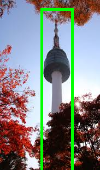

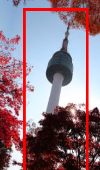

In [21]:
import imgaug as ia
from imgaug import augmenters as iaa
from files import *
from google.colab.patches import cv2_imshow

ia.seed(1)

dir = '/content/read/'
images, annotations = read_train_dataset(dir)

for idx in range(len(images)):
    image = images[idx]
    boxes = annotations[idx][0]

    ia_bounding_boxes = []
    for box in boxes:
        ia_bounding_boxes.append(ia.BoundingBox(x1=box[1], y1=box[2], x2=box[3], y2=box[4]))
   
    bbs = ia.BoundingBoxesOnImage(ia_bounding_boxes, shape=image.shape)

    ##augmentation 방식 결정
    #seq = iaa.Add((-10, 10), per_channel=0.5)
    seq = iaa.Sequential([
        iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
        iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        iaa.Sometimes(0.25,
                      iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
                                 iaa.CoarseDropout(0.1, size_percent=0.5)])),
        iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
    
    seq_det = seq.to_deterministic()

    image_aug = seq_det.augment_images([image])[0]
    bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

    for i in range(len(bbs.bounding_boxes)):
        before = bbs.bounding_boxes[i]
        after = bbs_aug.bounding_boxes[i]
        print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
            i,
            before.x1, before.y1, before.x2, before.y2,
            after.x1, after.y1, after.x2, after.y2)
        )

    image_before = bbs.draw_on_image(image, thickness=5)
    image_after = bbs_aug.draw_on_image(image_aug, thickness=5, color=[0, 0, 255])

    #cv2.imshow('image_before', cv2.resize(image_before, (380, 640)))
    #cv2.imshow('image_after', cv2.resize(image_after, (380, 640)))
    cv2_imshow(cv2.resize(image_before, (100, 170)))
    cv2_imshow(cv2.resize(image_after, (100, 170)))

    cv2.waitKey(0)